In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from skimage.feature import hog
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
from mlxtend.plotting import plot_confusion_matrix


In [19]:
data_latih = pd.read_csv('D:/4212201097/emnist-bymerge-train.csv', header=None)
data_uji = pd.read_csv('D:/4212201097/emnist-bymerge-test.csv', header=None)

In [20]:
latih_x = data_latih.iloc[:, 1:].values.reshape(-1, 28, 28).astype('float32')
latih_y = data_latih.iloc[:, 0].values.astype('int')
uji_x = data_uji.iloc[:, 1:].values.reshape(-1, 28, 28).astype('float32')
uji_y = data_uji.iloc[:, 0].values.astype('int')

In [21]:
max_samples = 1097
if len(latih_x) > max_samples:
    latih_x = latih_x[:max_samples]
    latih_y = latih_y[:max_samples]
    

In [22]:
if len(uji_x) > max_samples:
    uji_x = uji_x[:max_samples]
    uji_y = uji_y[:max_samples]

In [23]:
hog_features_latih = []
hog_images_latih = []
for image in latih_x:
    feature, hog_img = hog(image.reshape((28,28)), orientations = 9, pixels_per_cell = (8,8), cells_per_block = (2,2), visualize = True, block_norm = 'L2' )
    hog_features_latih.append(feature)
    hog_images_latih.append(hog_img)

hog_features_latih_np = np.array(hog_features_latih)
hog_images_latih_np = np.array(hog_images_latih)   

hog_features_uji = []    
hog_images_uji = []
for image in latih_x:
    feature, hog_img = hog(image.reshape((28,28)), orientations = 9, pixels_per_cell = (8,8), cells_per_block = (2,2), visualize = True, block_norm = 'L2' )
    hog_features_uji.append(feature)
    hog_images_uji.append(hog_img)

hog_features_uji_np = np.array(hog_features_uji)
hog_images_uji_np = np.array(hog_images_uji)





In [24]:
scaler = StandardScaler()
hog_features_latih_scaled = scaler.fit_transform(hog_features_latih_np)
hog_features_uji_scaled = scaler.transform(hog_features_uji_np)

In [25]:
svm_model = svm.SVC(kernel='linear', C=1)
svm_model.fit(hog_features_latih_scaled, latih_y)

SVC(C=1, kernel='linear')

In [26]:
loo = LeaveOneOut()
y_pred = cross_val_predict(svm_model, hog_features_latih_scaled, latih_y, cv = loo)


In [27]:
loo_confusion_matrix = confusion_matrix(latih_y, y_pred)
loo_accuracy = accuracy_score(latih_y, y_pred)
loo_precision = precision_score(latih_y, y_pred, average = 'weighted')
loo_recall = recall_score(latih_y, y_pred, average = 'weighted')
loo_f1 = f1_score(latih_y, y_pred, average = 'weighted')

In [28]:
print("\nLOOCV Result Data Training :")
print("Confusion Matrix :")
print(loo_confusion_matrix)
print("Accuracy :", loo_accuracy)
print("Precision :", loo_precision)
print("Recall :", loo_recall)
print("F1 :", loo_f1)


LOOCV Result Data Training :
Confusion Matrix :
[[41  0  0 ...  0  0  0]
 [ 0 42  0 ...  0  0  0]
 [ 1  0 50 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0 15  2]
 [ 0  0  0 ...  0  1 18]]
Accuracy : 0.6490428441203282
Precision : 0.6458259225880039
Recall : 0.6490428441203282
F1 : 0.641588751943633


In [29]:
def plot_confusion_mat(cm):
    fig, ax = plt.subplots(figsize = (10, 10))
    plot_confusion_matrix(conf_mat = cm, ax = ax, cmap = plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

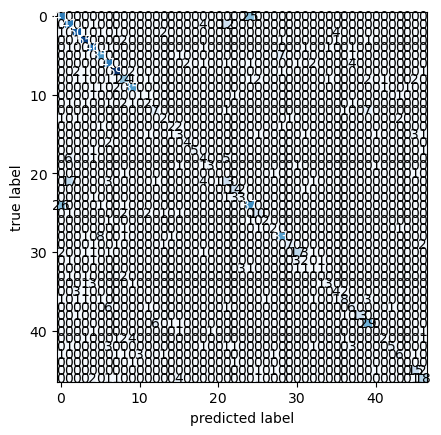

In [30]:
plot_confusion_matrix(loo_confusion_matrix)

In [31]:
def plot_images_with_hog(x, hog_images, title=""):
    fig, axes = plt.subplots(2, 10, figsize = (15, 5))
    fig.suptitle(title)
    
    for i in range(min(len(x), 10)):
        axes[0, i].imshow(x[i].reshape((28, 28)), cmap = 'gray')
        axes[0, i].axis('off')

    for i in range(min(len(hog_images), 10)):
        axes[1, i].imshow(hog_images[i].reshape((28, 28)), cmap = 'gray')
        axes[1, i].axis('off')
        
    plt.show()

In [32]:
def extract_hog_images(images):
    hog_images = []
    for image in images:
        _, hog_img = hog(image.reshape((28,28)), orientations = 9, pixels_per_cell = (8,8), cells_per_block = (2,2), visualize = True, block_norm = 'L2')
        hog_images.append(hog_img)
    
    return np.array(hog_images)


In [33]:
hog_images_train = extract_hog_images(latih_x)

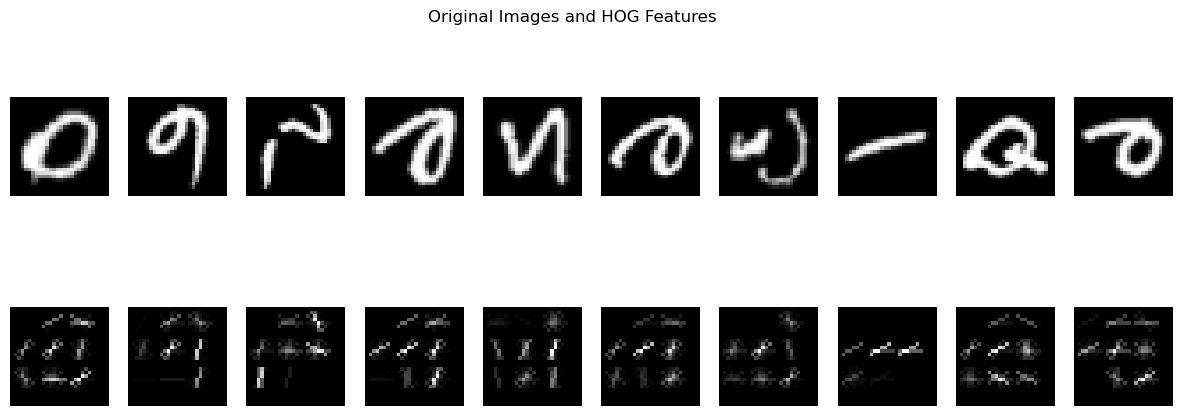

In [34]:
plot_images_with_hog(latih_x, hog_images_train, title = "Original Images and HOG Features")